# Car Price Prediction

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Reading the data:

In [8]:
df = pd.read_csv('C:\\Users\\ss\\Downloads\\ML Project 2_ Automobile\\AutoData.csv')
df.head()

,symboling,date,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,Yas,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,No,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,yas,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,no,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,no,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.shape

(205, 26)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   date              205 non-null    object 
 2   make              205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
 df.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99])

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
10%,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
99%,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


In [15]:
df.isnull().sum()

symboling           0
date                0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
 df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

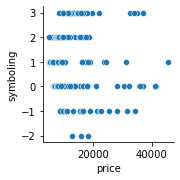

In [16]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' , data = df)

In [17]:
#Column CarName
df['make'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: make, Length: 147, dtype: int64

We see that CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.

In [18]:
df['car_company'] = df['make'].apply(lambda x:x.split(' ')[0])


In [19]:
#rechecking
df.head()

,symboling,date,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,Yas,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,No,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,yas,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,no,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,no,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [24]:
#deleting the original column
df = df.drop(['make'], axis =3)

ValueError: No axis named 3 for object type DataFrame

In [25]:
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [27]:
df['car_company'].replace('toyouta', 'toyota',inplace=True)
df['car_company'].replace('Nissan', 'nissan',inplace=True)
df['car_company'].replace('maxda', 'mazda',inplace=True)
df['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
df['car_company'].replace('vw', 'volkswagen',inplace=True)
df['car_company'].replace('porcshce', 'porsche',inplace=True)

In [29]:
#rechecking the data:
df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [30]:
# fueltype - Car fuel type i.e gas or diesel
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [31]:
#aspiration - Aspiration used in a car
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [32]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
df['doornumber'] = df[['doornumber']].apply(number_)

In [35]:
#rechecking
df['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [37]:
#carbody- body of car
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [38]:
#drivewheel - type of drive wheel
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [39]:
#enginelocation - Location of car engine
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [40]:
#wheelbase - Weelbase of car 
df['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

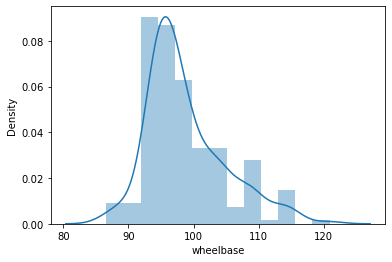

In [42]:
sns.distplot(df['wheelbase'])
plt.show()

In [43]:
#carlength - Length of car
df['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

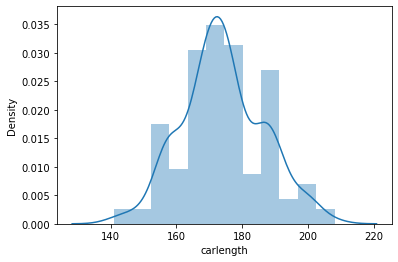

In [44]:
sns.distplot(df['carlength'])
plt.show()

In [45]:
#enginetype - Type of engine.
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [46]:
#cylindernumber- cylinder placed in the car
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [47]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

df['cylindernumber'] = df[['cylindernumber']].apply(convert_number)


In [48]:
#re-checking
df['cylindernumber'].value_counts()


4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [49]:
#fuelsystem - Fuel system of car
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64